In [1]:
import os

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

from utils import load_data

#work_dir='/nagyvinyok/adat84/sotejedlik/ribli/mhc'
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

In [15]:
x,y=load_data(hla_representation='one-hot',seq_representation='one-hot')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 1.93948912621 s


In [16]:
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression

model=LinearRegression()
y_pred=cross_val_predict(model,x,y,cv=5)

In [17]:
# some results are like 1e13, just clip them
y_pred=np.clip(y_pred,0,7)

(0.45553662560364516, 0.0)


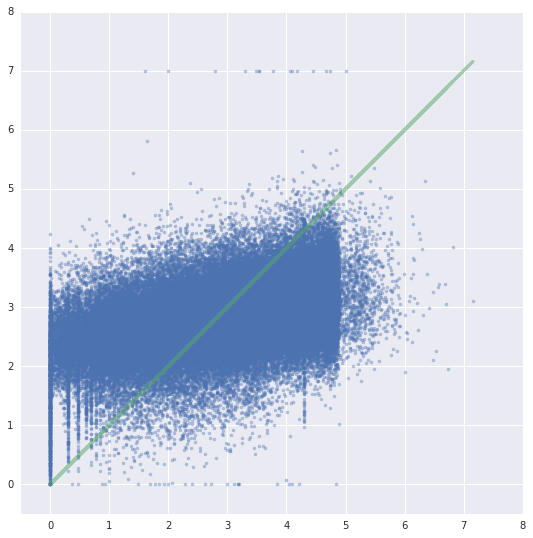

In [18]:
plt.figure(figsize=(9,9))
plt.plot(y,y_pred,'.',alpha=0.4)
plt.plot(y,y,lw=3,alpha=0.5)
plt.xlim(xmin=-0.5)
plt.ylim(-0.5,8)
from scipy.stats import pearsonr
print pearsonr(y,y_pred)